In [1]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
%matplotlib inline


# Analyze

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [3]:
df=pd.read_csv('Train_Dataset.csv')
df_test=pd.read_csv('Test_Dataset.csv')

In [4]:
df.columns

Index(['customer_id', 'account_length', 'location_code', 'intertiol_plan',
       'voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'Churn', 'Unnamed: 20'],
      dtype='object')

In [5]:
df_test.columns

Index(['customer_id', 'account_length', 'location_code', 'intertiol_plan',
       'voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [6]:
df.drop(df[df['Churn'].isna()].index,inplace=True)

In [7]:
df_copy=df.copy()
df_test_copy=df_test.copy()

In [8]:
def drop_columns(df, columns):
    df.drop(columns, axis=1, inplace=True, errors='ignore')

In [9]:
drop_columns(df,['customer_id','Unnamed: 20'])
drop_columns(df_test,['customer_id','Unnamed: 19', 'Unnamed: 20'])

In [10]:
df_ana=df.copy()

In [11]:
df.columns

Index(['account_length', 'location_code', 'intertiol_plan', 'voice_mail_plan',
       'number_vm_messages', 'total_day_min', 'total_day_calls',
       'total_day_charge', 'total_eve_min', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'Churn'],
      dtype='object')

In [12]:
df.isna().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [13]:
numerical_columns=['location_code','account_length', 'number_vm_messages', 'total_day_min', 'total_day_calls', 'total_day_charge', 'total_eve_min', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

In [14]:
df['location_code'].unique()

array([452, 445, 547])

# Drop Duplicates

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
# df.shape

# Resolve invalide data

In [17]:
# df.describe()

In [18]:
for i in numerical_columns:
  df[i]=df[i].mask(df[i]<0,np.nan)
  df_test[i].mask(df_test[i]<0,np.nan)

# Handle Outliers

In [19]:
# fig = plt.figure(figsize=(30,10))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for i in range(1,17):
#   fig.add_subplot(4,4,i)
#   sns.boxplot(x=df[numerical_columns[i-1]])

In [20]:
#Detecting outliers using the Z-scores
def detect_outliers_zscore(data):
    outliers=[]
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

def replace_outliers(data):
    outliers=detect_outliers_zscore(data)
    # median = np.median(data)
    for i in outliers:
        data.replace(i,np.nan,inplace=True)# Replace with nan
    return data

In [21]:
for i in numerical_columns:
  replace_outliers(df[i])
  replace_outliers(df_test[i])

In [22]:
# fig = plt.figure(figsize=(30,10))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for i in range(1,17):
#   fig.add_subplot(4,4,i)
#   sns.boxplot(x=df[numerical_columns[i-1]])

# Handle missing values

In [23]:
# msno.matrix(df)

In [24]:
# msno.bar(df)

In [25]:
# df.isna().sum()

In [26]:
mode_intertiol_plan = df['intertiol_plan'].mode().iloc[0]
# print(mode_intertiol_plan)
mode_intertiol_plan_test=df_test['intertiol_plan'].mode().iloc[0]
# print(mode_intertiol_plan)

mode_voice_mail_plan=df['voice_mail_plan'].mode().iloc[0]
mode_voice_mail_plan_test=df_test['intertiol_plan'].mode().iloc[0]

In [27]:
#print(df['intertiol_plan'].unique(),mode_intertiol_plan)
# df['intertiol_plan']=df['intertiol_plan'].fillna(mode_intertiol_plan)
# df['intertiol_plan']=df_test['intertiol_plan'].fillna(value=mode_intertiol_plan_test)

In [28]:
#print(df['voice_mail_plan'].unique(),mode_voice_mail_plan)
# df['voice_mail_plan']=df['voice_mail_plan'].fillna(value=mode_voice_mail_plan)
# df['voice_mail_plan']=df_test['voice_mail_plan'].fillna(value=mode_voice_mail_plan_test)

In [29]:
cols = ["intertiol_plan", "voice_mail_plan"]
df_test[cols]=df_test[cols].fillna(df_test.mode().iloc[0])

In [30]:
cols = ["intertiol_plan", "voice_mail_plan"]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [31]:
df.isna().sum()

account_length             8
location_code              0
intertiol_plan             0
voice_mail_plan            0
number_vm_messages         6
total_day_min              6
total_day_calls            5
total_day_charge          12
total_eve_min              5
total_eve_calls           12
total_eve_charge          16
total_night_minutes        3
total_night_calls         17
total_night_charge         6
total_intl_minutes        17
total_intl_calls          36
total_intl_charge         17
customer_service_calls    35
Churn                      0
dtype: int64

In [32]:
for i in numerical_columns:
  df[i].fillna(value=df[i].median(),inplace=True)
  df_test[i].fillna(value=df_test[i].median(),inplace=True)

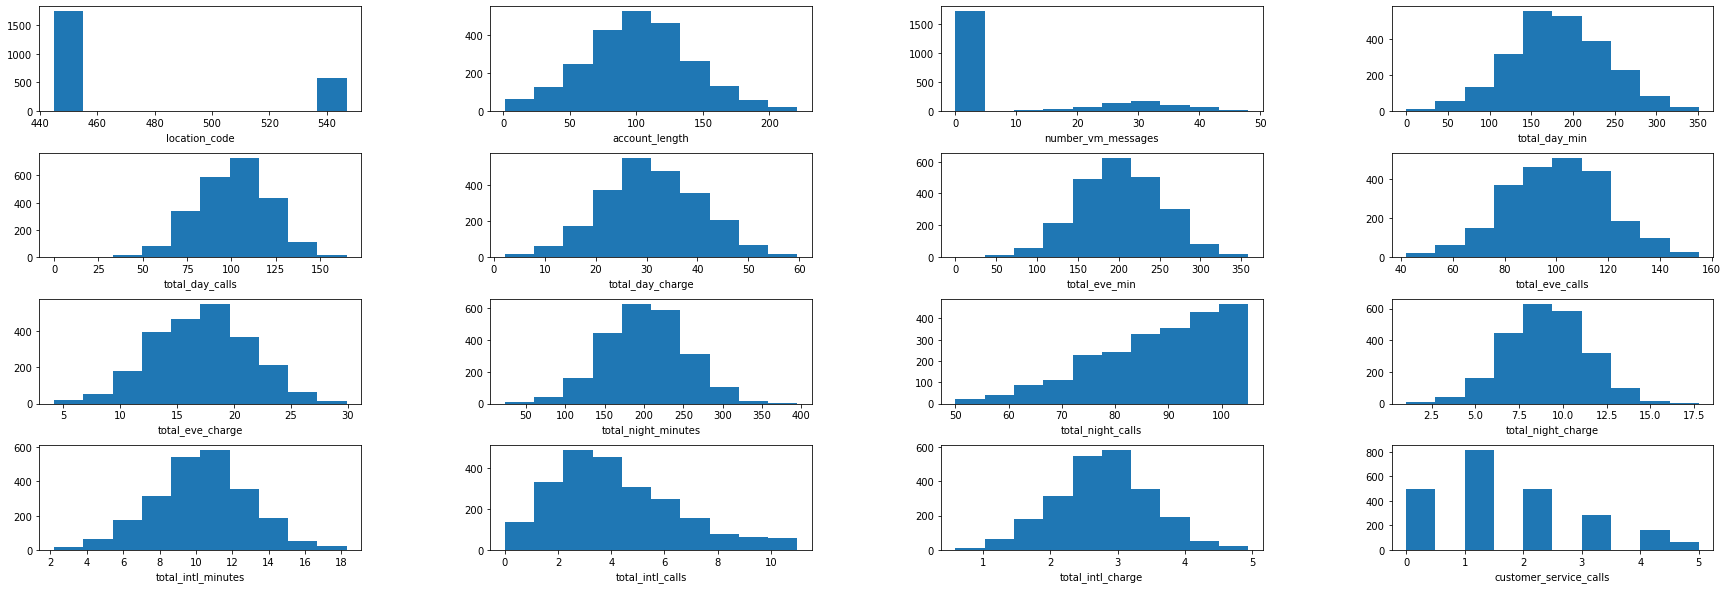

In [33]:
fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,17):
  fig.add_subplot(4,4,i)
  plt.hist(x=df[numerical_columns[i-1]])
  plt.xlabel(numerical_columns[i-1])

In [34]:
print(df['intertiol_plan'].unique())
print(df['voice_mail_plan'].unique())
print(df['Churn'].unique())

['no' 'yes']
['no' 'yes']
['No' 'Yes']


In [35]:
df[df["Churn"]==np.nan]

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [36]:
df_carrot = df.copy()

In [37]:
df_carrot

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,90.0,10.58,16.1,5.0,4.35,2.0,No
1,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,90.0,10.01,12.0,5.0,3.24,3.0,No
2,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,90.0,9.16,6.7,4.0,1.81,5.0,No
3,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,90.0,8.88,11.4,4.0,3.08,1.0,No
4,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,90.0,4.84,9.7,5.0,2.62,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,109.0,452,no,no,0.0,180.0,100.0,30.60,229.0,103.0,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,No
2317,185.0,452,yes,yes,30.0,154.1,114.0,26.20,118.7,106.0,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,No
2318,55.0,452,yes,no,0.0,188.9,88.0,34.62,270.1,105.0,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,Yes
2319,138.0,547,yes,no,0.0,191.2,130.0,32.35,164.5,88.0,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,Yes


# pycarrot

In [38]:
# from pycaret.classification import *
# s = setup(df, target = 'Churn')

In [39]:
# best = compare_models()

# Encording

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [41]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()

In [42]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['location_code'])
one_hot_encoded_data_test = pd.get_dummies(df_test, columns = ['location_code'])
# print(one_hot_encoded_data)
df = one_hot_encoded_data
df_test = one_hot_encoded_data_test

In [43]:
df

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location_code_445,location_code_452,location_code_547
0,15.0,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,...,90.0,10.58,16.1,5.0,4.35,2.0,No,0,1,0
1,105.0,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,...,90.0,10.01,12.0,5.0,3.24,3.0,No,0,1,0
2,97.0,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,...,90.0,9.16,6.7,4.0,1.81,5.0,No,0,1,0
3,121.0,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,...,90.0,8.88,11.4,4.0,3.08,1.0,No,1,0,0
4,98.0,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,...,90.0,4.84,9.7,5.0,2.62,0.0,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,109.0,no,no,0.0,180.0,100.0,30.60,229.0,103.0,19.47,...,105.0,6.27,7.8,8.0,2.11,3.0,No,0,1,0
2317,185.0,yes,yes,30.0,154.1,114.0,26.20,118.7,106.0,10.09,...,105.0,11.63,12.9,3.0,3.48,2.0,No,0,1,0
2318,55.0,yes,no,0.0,188.9,88.0,34.62,270.1,105.0,22.77,...,105.0,9.17,14.3,5.0,3.86,1.0,Yes,0,1,0
2319,138.0,yes,no,0.0,191.2,130.0,32.35,164.5,88.0,14.00,...,105.0,10.46,15.2,1.0,4.10,0.0,Yes,0,0,1


In [44]:
lab_cols=['intertiol_plan','voice_mail_plan','Churn']

In [45]:
lab_cols_test=['intertiol_plan','voice_mail_plan']

In [46]:
df[lab_cols] =df[lab_cols].apply(label_encoder.fit_transform)
df_test[lab_cols_test] =df_test[lab_cols_test].apply(label_encoder.fit_transform)

In [47]:
std_cols=['account_length','number_vm_messages','total_day_min','total_day_calls','total_day_charge','total_eve_min','total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls','total_night_charge', 'total_intl_minutes','total_intl_charge','customer_service_calls']

In [48]:
X_train_carrot = df.iloc[:,:-1].values
y_train_carrot = df.iloc[:,-1].values
X_test_carrot = df_test.values
y_train_carrot

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [49]:
target = df['Churn']
target

0       0
1       0
2       0
3       0
4       0
       ..
2316    0
2317    0
2318    1
2319    1
2320    1
Name: Churn, Length: 2312, dtype: int64

In [50]:
df = df.drop(["Churn",'location_code'], axis=1, inplace=False, errors='ignore')
df.tail()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,location_code_445,location_code_452,location_code_547
2316,109.0,0,0,0.0,180.0,100.0,30.60,229.0,103.0,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,0,1,0
2317,185.0,1,1,30.0,154.1,114.0,26.20,118.7,106.0,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,0,1,0
2318,55.0,1,0,0.0,188.9,88.0,34.62,270.1,105.0,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,0,1,0
2319,138.0,1,0,0.0,191.2,130.0,32.35,164.5,88.0,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,0,0,1
2320,24.0,0,0,0.0,251.0,95.0,40.31,179.9,77.0,16.63,189.3,105.0,8.29,15.3,7.0,4.13,0.0,0,0,1


In [51]:
df_test = df_test.drop(['location_code'], axis=1, inplace=False, errors='ignore')
df_test.tail()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,location_code_445.0,location_code_452.0,location_code_547.0
1495,23.0,0,0,0.0,321.6,107.0,54.67,251.6,115.0,21.39,141.1,117.0,6.35,11.3,3.0,3.05,2.0,0,0,1
1496,23.0,0,0,0.0,334.6,107.0,52.67,261.6,121.0,21.39,127.1,117.0,6.35,11.3,2.0,3.05,2.0,0,0,1
1497,103.0,0,0,0.0,70.9,134.0,12.05,134.5,112.0,11.43,168.8,117.0,7.60,12.0,6.0,3.24,2.0,0,1,0
1498,34.0,0,0,0.0,193.7,74.0,32.93,126.9,84.0,10.79,221.2,117.0,9.95,8.8,4.0,2.38,0.0,0,1,0
1499,129.0,0,1,33.0,119.6,104.0,20.33,278.7,88.0,23.69,263.4,117.0,11.85,5.9,2.0,1.59,2.0,0,1,0


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)
df_test = sc.fit_transform(df_test)

In [53]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.182479,-0.371962,-0.588672,-0.563592,-1.064785,1.433627,-1.084593,0.283817,-0.737625,0.287051,0.673010,0.172495,0.673448,2.206301,0.323585,2.209786,0.332676,-0.591337,1.009561,-0.570691
1,0.101419,-0.371962,-0.588672,-0.563592,1.338709,-0.236541,1.354453,-0.518760,-0.171427,-0.531962,0.421879,0.172495,0.422751,0.640263,0.323585,0.640080,1.104912,-0.591337,1.009561,-0.570691
2,-0.101594,-0.371962,1.698739,1.802989,0.018700,-0.334786,0.015003,1.328347,1.012443,1.351533,0.048149,0.172495,0.048905,-1.384127,-0.138223,-1.382154,2.649384,-0.591337,1.009561,-0.570691
3,0.507445,-0.371962,1.698739,2.024856,-1.976096,-0.285663,-2.009748,0.150054,-1.612659,0.150156,-0.072473,0.172495,-0.074244,0.411087,-0.138223,0.413816,-0.439560,1.691084,-0.990529,-0.570691
4,-0.076218,-0.371962,1.698739,1.063433,1.669146,-0.580399,1.689835,-2.127848,2.196312,-2.172350,-1.848185,0.172495,-1.851113,-0.238246,0.323585,-0.236693,-1.211796,-0.591337,1.009561,-0.570691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,0.202925,-0.371962,-0.588672,-0.563592,-0.040431,-0.040050,-0.045221,0.539540,0.137409,0.549041,-1.219370,1.390847,-1.222172,-0.963971,1.709010,-0.957909,1.104912,-0.591337,1.009561,-0.570691
2308,2.131551,2.688449,1.698739,1.655078,-0.490868,0.647666,-0.502087,-1.630171,0.291826,-1.664892,1.133746,1.390847,1.135258,0.984027,-0.600031,0.979476,0.332676,-0.591337,1.009561,-0.570691
2309,-1.167414,2.688449,-0.588672,-0.563592,0.114353,-0.629521,0.372190,1.348018,0.240354,1.327931,0.170748,1.390847,0.053303,1.518772,0.323585,1.516853,-0.439560,-0.591337,1.009561,-0.570691
2310,0.938848,2.688449,-0.588672,-0.563592,0.154353,1.433627,0.136488,-0.729239,-0.634680,-0.742026,0.797586,1.390847,0.620670,1.862536,-1.523648,1.856248,-1.211796,-0.591337,-0.990529,1.752262


In [54]:
X_train = df
y_train = target.values

In [55]:
X_test=df_test

In [56]:
X_train[0]

array([-2.18247942, -0.37196168, -0.58867194, -0.56359208, -1.06478532,
        1.43362734, -1.08459256,  0.28381718, -0.73762529,  0.2870515 ,
        0.67300977,  0.17249456,  0.67344817,  2.20630062,  0.32358535,
        2.20978576,  0.33267609, -0.59133656,  1.00956128, -0.57069087])

In [57]:
X_test[0]

array([-0.25200936,  2.7252461 , -0.61022096, -0.58084303,  1.30108488,
        0.59148002,  1.18892635, -0.27099304, -0.35006509, -0.65959496,
       -0.89862945, -1.38733882, -0.92002481,  0.62040318, -0.57164366,
        0.62226759,  0.36166022,  1.78932408, -0.99468081, -0.59993956])

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
df_y_pred = pd.DataFrame(y_pred,columns=['Churn'])
df_y_pred["Churn"]= df_y_pred["Churn"].map({0: "No", 1: "Yes"})

In [62]:
dataset_test = pd.concat([df_test_copy['customer_id'], df_y_pred], axis=1)
dataset_test.tail()

,customer_id,Churn
1495,4817,Yes
1496,4818,Yes
1497,4819,No
1498,4820,No
1499,4821,No


In [63]:
dataset_test.to_csv("KNN.csv", index=False)

# SVM


In [64]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [65]:
df_y_pred_svm = pd.DataFrame(y_pred,columns=['Churn'])
df_y_pred_svm["Churn"]= df_y_pred_svm["Churn"].map({0: "No", 1: "Yes"})

In [66]:
dataset_test_svm = pd.concat([df_test_copy['customer_id'], df_y_pred_svm], axis=1)
dataset_test_svm.tail()

,customer_id,Churn
1495,4817,No
1496,4818,No
1497,4819,No
1498,4820,No
1499,4821,No


In [67]:
dataset_test_svm.to_csv("SVM.csv", index=False)

# lightgbm

In [68]:
# pip install lightgbm

In [69]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [70]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [71]:
pred = model.predict(X_test)
print(pred)

[0 1 1 ... 0 0 0]


In [72]:
df_y_pred_light = pd.DataFrame(pred,columns=['Churn'])
df_y_pred_light["Churn"]= df_y_pred_light["Churn"].map({0: "No", 1: "Yes"})

In [73]:
df_y_pred_light = pd.concat([df_test_copy['customer_id'], df_y_pred_light], axis=1)
df_y_pred_light.tail()

,customer_id,Churn
1495,4817,Yes
1496,4818,Yes
1497,4819,No
1498,4820,No
1499,4821,No


In [74]:
df_y_pred_light.to_csv("Lightgbm.csv", index=False)

# Catboost


In [75]:
# pip install catboost

In [76]:
X_train.shape

(2312, 20)

In [77]:
 import catboost as ctb

ModuleNotFoundError: No module named 'catboost'

In [ ]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train_carrot, y_train_carrot)
print(model_CBC)

Learning rate set to 0.014735
0:	learn: 0.6512034	total: 11.3ms	remaining: 11.3s
1:	learn: 0.6094413	total: 20.4ms	remaining: 10.2s
2:	learn: 0.5752550	total: 26.7ms	remaining: 8.88s
3:	learn: 0.5422314	total: 31.7ms	remaining: 7.89s
4:	learn: 0.5094462	total: 36.6ms	remaining: 7.29s
5:	learn: 0.4800116	total: 41.7ms	remaining: 6.91s
6:	learn: 0.4498065	total: 46.9ms	remaining: 6.65s
7:	learn: 0.4260294	total: 51.5ms	remaining: 6.38s
8:	learn: 0.4022044	total: 55.1ms	remaining: 6.07s
9:	learn: 0.3769745	total: 58.8ms	remaining: 5.82s
10:	learn: 0.3542724	total: 61.9ms	remaining: 5.57s
11:	learn: 0.3348101	total: 65.1ms	remaining: 5.36s
12:	learn: 0.3144147	total: 68.7ms	remaining: 5.21s
13:	learn: 0.2945963	total: 72.1ms	remaining: 5.07s
14:	learn: 0.2772004	total: 75.4ms	remaining: 4.95s
15:	learn: 0.2613567	total: 78.5ms	remaining: 4.83s
16:	learn: 0.2462919	total: 81.9ms	remaining: 4.74s
17:	learn: 0.2341778	total: 85.5ms	remaining: 4.66s
18:	learn: 0.2203953	total: 90.2ms	remaining

In [ ]:
predicted_y = model_CBC.predict(X_test_carrot)

In [ ]:
df_y_pred_cat = pd.DataFrame(predicted_y,columns=['Churn'])
df_y_pred_cat["Churn"]= df_y_pred_cat["Churn"].map({0: "No", 1: "Yes"})

In [ ]:
df_y_pred_cat = pd.concat([df_test_copy['customer_id'], df_y_pred_cat], axis=1)
df_y_pred_cat.tail()

,customer_id,Churn
1495,4817,No
1496,4818,No
1497,4819,No
1498,4820,No
1499,4821,No


In [ ]:
df_y_pred_cat.to_csv("Catboost.csv", index=False)

# Random Forest

In [ ]:
# from sklearn.model_selection import train_test_split
# X0_train, X0_test, y0_train, y0_test = train_test_split(X_train, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

In [ ]:
rf_Model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
 y_pred_random = rf_Model.predict(X_test)

In [ ]:
# gridF = GridSearchCV(estimator=rf_Model, param_grid = hyperF, cv = 3, verbose = 1, n_jobs = -1)


In [ ]:
# bestF = gridF.fit(X0_train, y0_train)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)    

# model_regressor.fit(X0_train, y0_train)
# y_random_pred = model_regressor.predict(X0_test)

In [ ]:
y_test.shape[0]

NameError: name 'y_test' is not defined

In [ ]:
print((y0_test==y_random_pred).sum()/y0_test.shape[0])

In [ ]:
import joblib
joblib.dump(rf_Model,"random-forest")

In [ ]:
# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(dataset_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
dataset_train = pd.concat([df_copy['customer_id'], df], axis=1).reindex(df.index)
dataset_test = pd.concat([df_test_copy['customer_id'], y_pred], axis=1).reindex(df_test.index)

In [ ]:
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(dataset_train.corr(), dtype=np.bool))
# heatmap = sns.heatmap(dataset_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# dataset_train.corr()[['Churn']].sort_values(by='Churn', ascending=False)
# plt.figure(figsize=(8, 12))
# heatmap = sns.heatmap(dataset_train.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with churn', fontdict={'fontsize':18}, pad=16);

In [ ]:
# dataset_train['Churn'].plot(kind='barh')

In [ ]:
"""# Write Datasets"""
# dataset_train = df
# dataset_test = df_test